In [1]:
%pylab inline
import os; os.sys.path.append('..')
from pyannote.core import Segment, Annotation
from pyannote.core.notebook import notebook
figsize(20, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from etape import Etape
protocol = Etape('/Users/bredin/Corpora/etape/')
_, timeline, reference = next(protocol.train_iter())
annotation = reference.crop(Segment(500, 1000)).anonymize_labels()

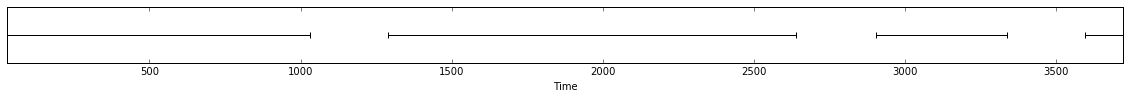

In [3]:
notebook.reset()
timeline

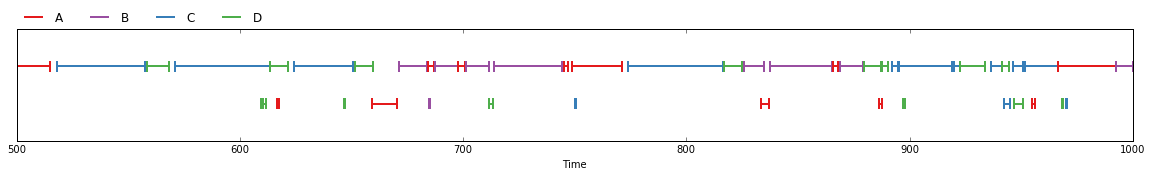

In [4]:
notebook.reset()
annotation

In [5]:
def plot_segment_generator(source, generator, N=10):
    notebook.reset()
    subplot(N+1, 1, 1)
    notebook.plot_timeline(source, time=False)
    for i, segment in enumerate(generator):
        if i == N:
            break
        subplot(N+1, 1, i+2)
        notebook.plot_segment(segment, time=i==(N-1))
    tight_layout()

## Sliding segments

In [6]:
from generators.fragment import SlidingSegments
factory = SlidingSegments(duration=300, step=200)
generator = factory.iter_segments(timeline)

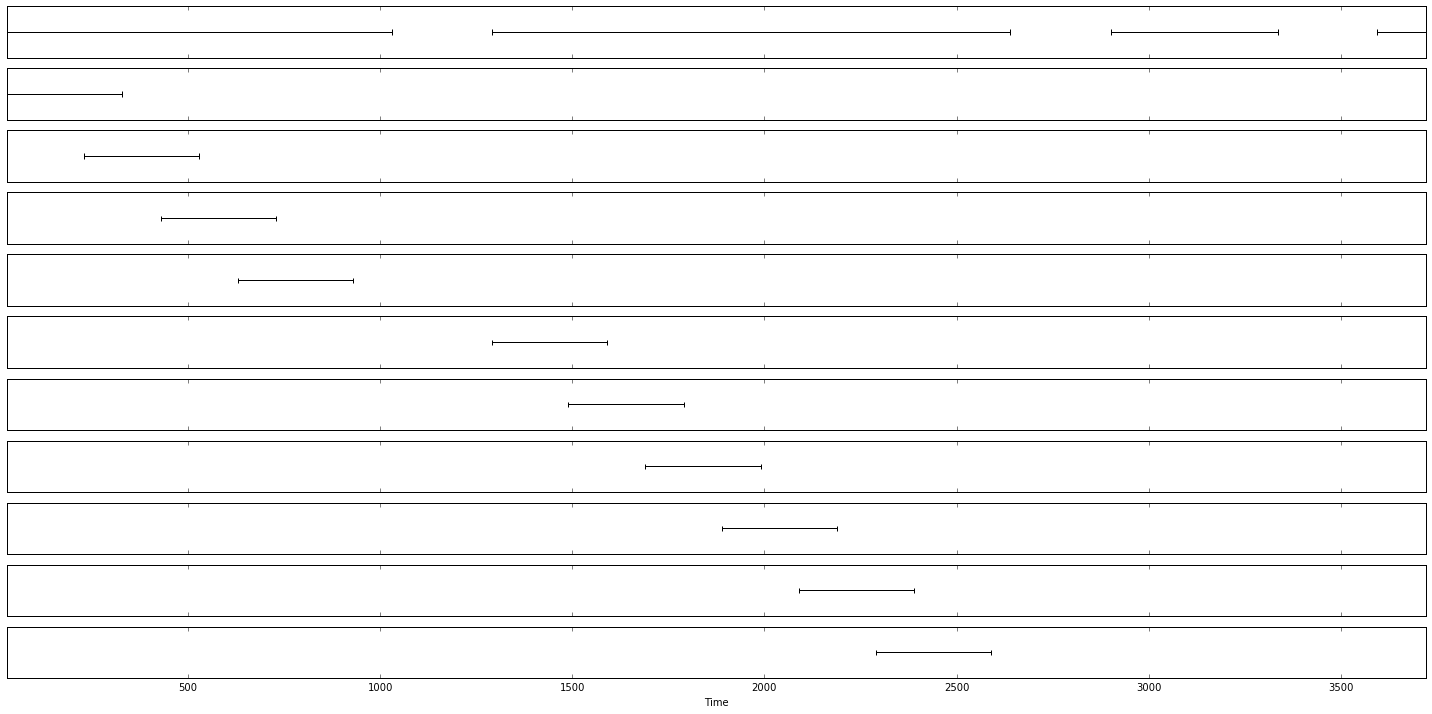

In [7]:
plot_segment_generator(timeline, generator, N=10)

## Random segments

In [8]:
from generators.fragment import RandomSegments
factory = RandomSegments(duration=300)
generator = factory.iter_segments(timeline)

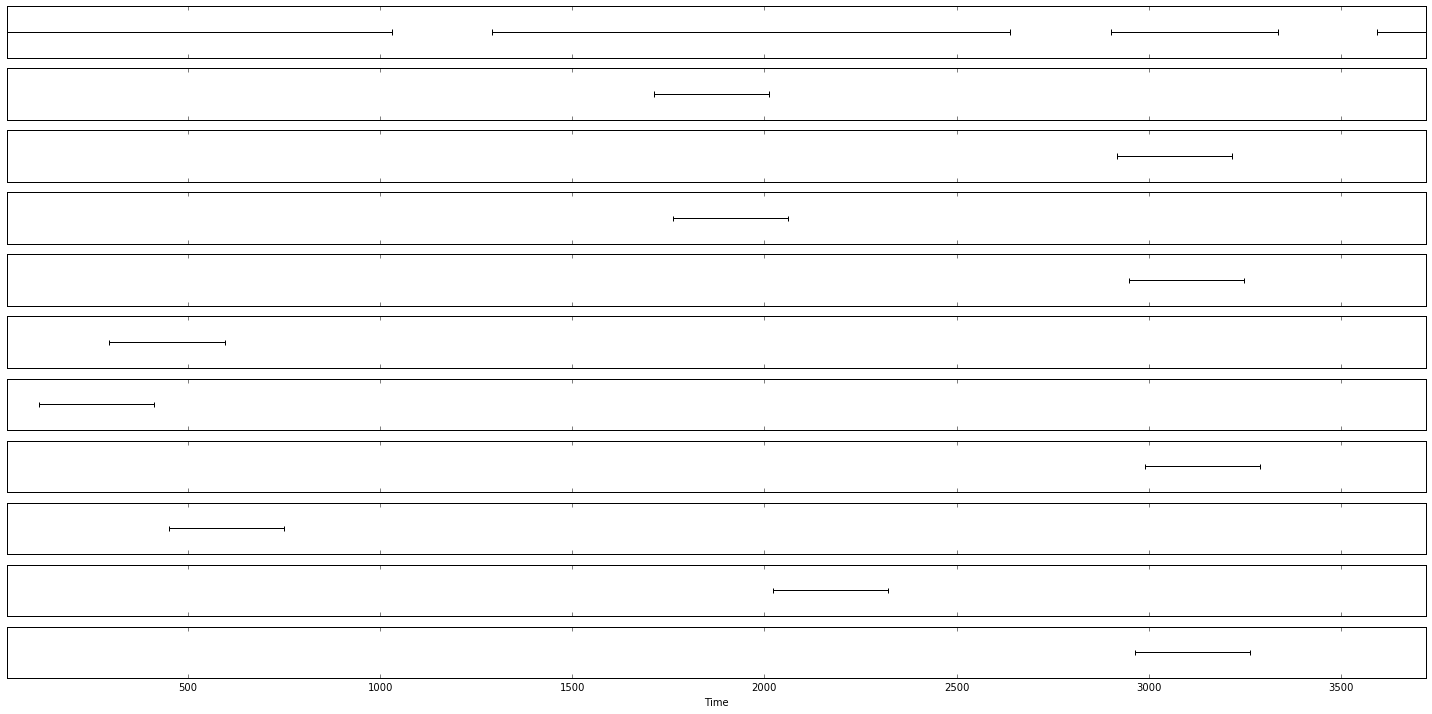

In [9]:
plot_segment_generator(timeline, generator, N=10)

## Random tracks

In [10]:
def plot_track_generator(source, generator, N=10):
    notebook.reset()
    subplot(N+1, 1, 1)
    notebook.plot_annotation(source, time=False)
    for i, (segment, track, label) in enumerate(generator):
        if i == N:
            break
        subplot(N+1, 1, i+2)
        annotation = Annotation()
        annotation[segment, track] = label
        notebook.plot_annotation(annotation, time=i==(N-1), legend=False)
    tight_layout()

In [11]:
from generators.fragment import RandomTracks
factory = RandomTracks()
generator = factory.iter_tracks(annotation, yield_label=True)

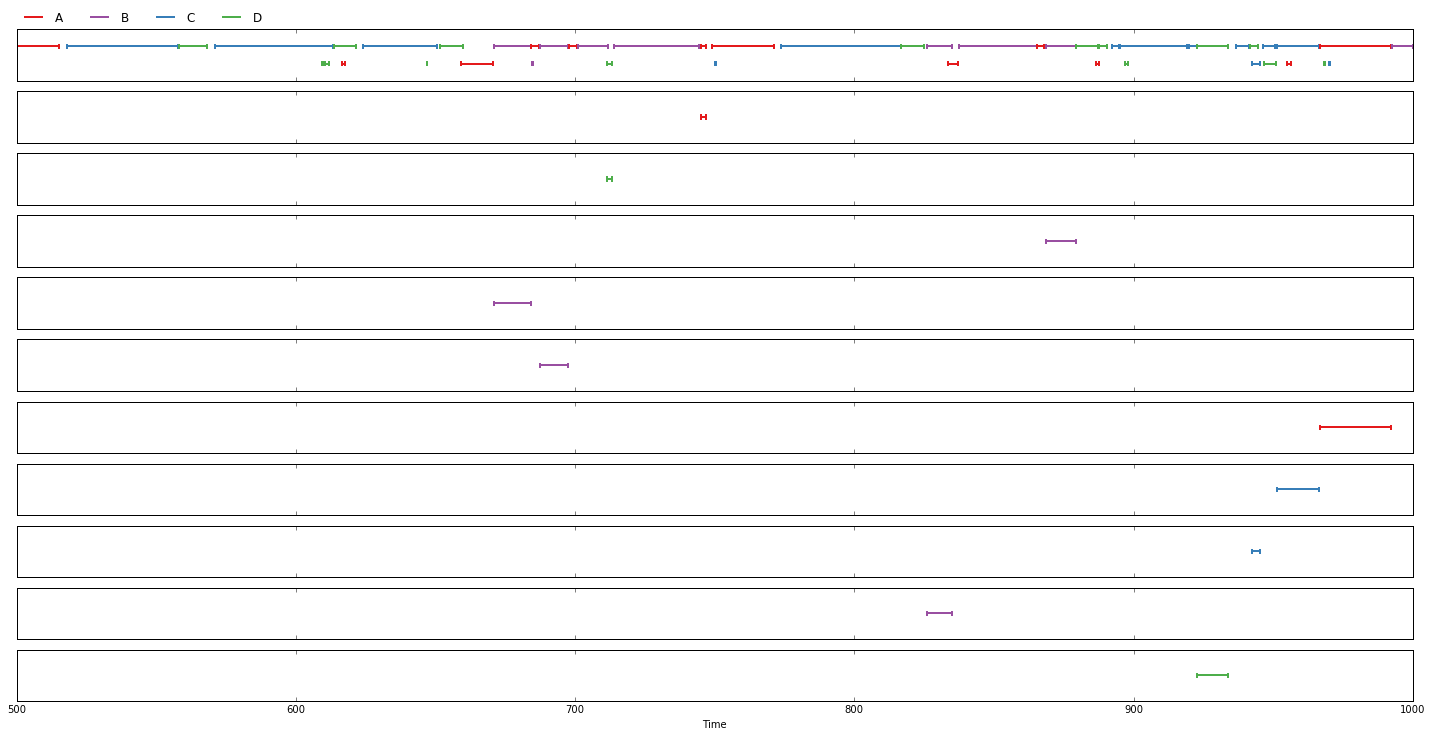

In [12]:
plot_track_generator(annotation, generator, N=10)

## Random tracks triplets

In [13]:
def plot_triplet_generator(source, generator, N=10):
    notebook.reset()
    subplot2grid((N+1, 3), (0, 0), colspan=3)
    notebook.plot_annotation(source, time=False, legend=True)
    for i, (anchor, positive, negative) in enumerate(generator):
        if i == N:
            break
        for k, item in enumerate([anchor, positive, negative]):
            subplot2grid((N+1, 3), (i+1, k))
            annotation = Annotation()
            annotation[item[0], '_'] = item[-1]
            notebook.plot_annotation(annotation, time=i==(N-1), legend=False)
    tight_layout()

In [14]:
from generators.fragment import RandomTrackTriplets
factory = RandomTrackTriplets(per_label=3)
generator = factory.iter_triplets(annotation, yield_label=True)

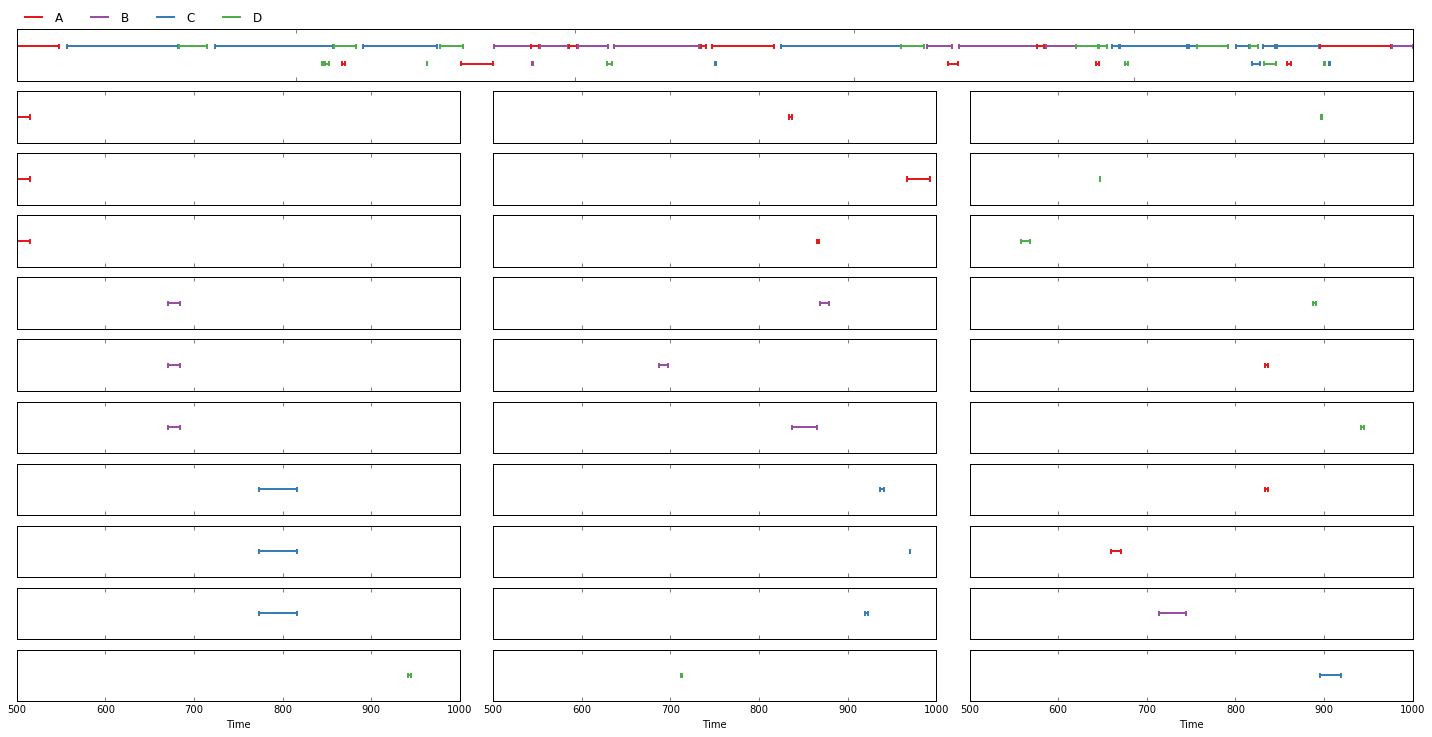

In [15]:
plot_triplet_generator(annotation, generator, N=10)

## Random segment triplets

In [16]:
from generators.fragment import RandomSegmentTriplets
factory = RandomSegmentTriplets(per_label=3, duration=5.0)
generator = factory.iter_triplets(annotation, yield_label=True)

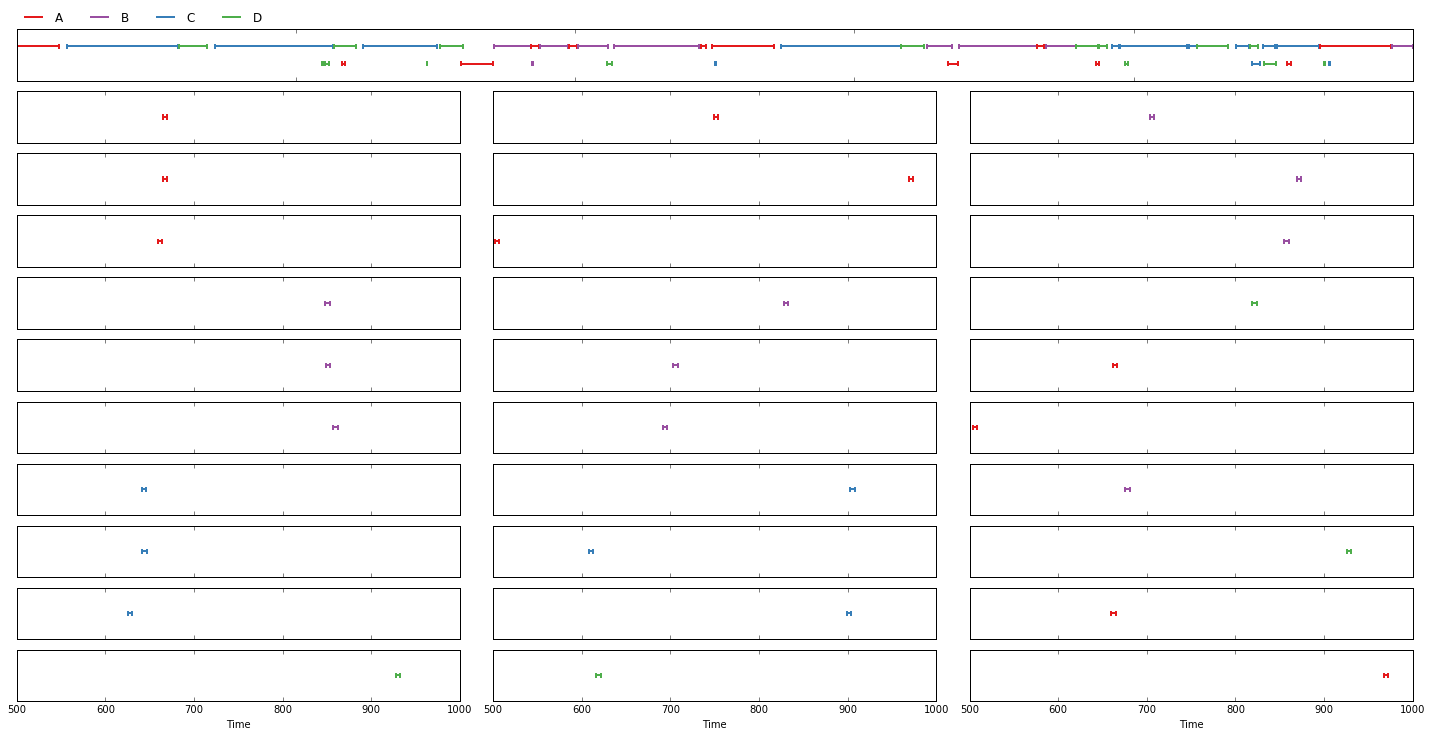

In [17]:
plot_triplet_generator(annotation, generator, N=10)

## Random segment pairs

In [18]:
def plot_pair_generator(source, generator, N=10):
    notebook.reset()
    subplot2grid((N+1, 3), (0, 0), colspan=3)
    notebook.plot_annotation(source, time=False, legend=True)
    for i, ((query, returned), relevance) in enumerate(generator):
        if i == N:
            break
        for k, item in enumerate([query, returned]):
            subplot2grid((N+1, 3), (i+1, k))
            annotation = Annotation()
            annotation[item[0], '_'] = item[-1]
            notebook.plot_annotation(annotation, time=i==(N-1), legend=False)
        subplot2grid((N+1, 3), (i+1, 2))
        imshow(relevance * np.ones((1, 1)), vmax=1., vmin=0., cmap=cm.Greys)
        #text(0.5, 0.5, 'positive' if relevance else 'negative', size=18, ha='center', va='center')
        axis('off')
    tight_layout()

In [19]:
from generators.fragment import RandomSegmentPairs
factory = RandomSegmentPairs(per_label=2, duration=5.0)
generator = factory.iter_pairs(annotation, yield_label=True)

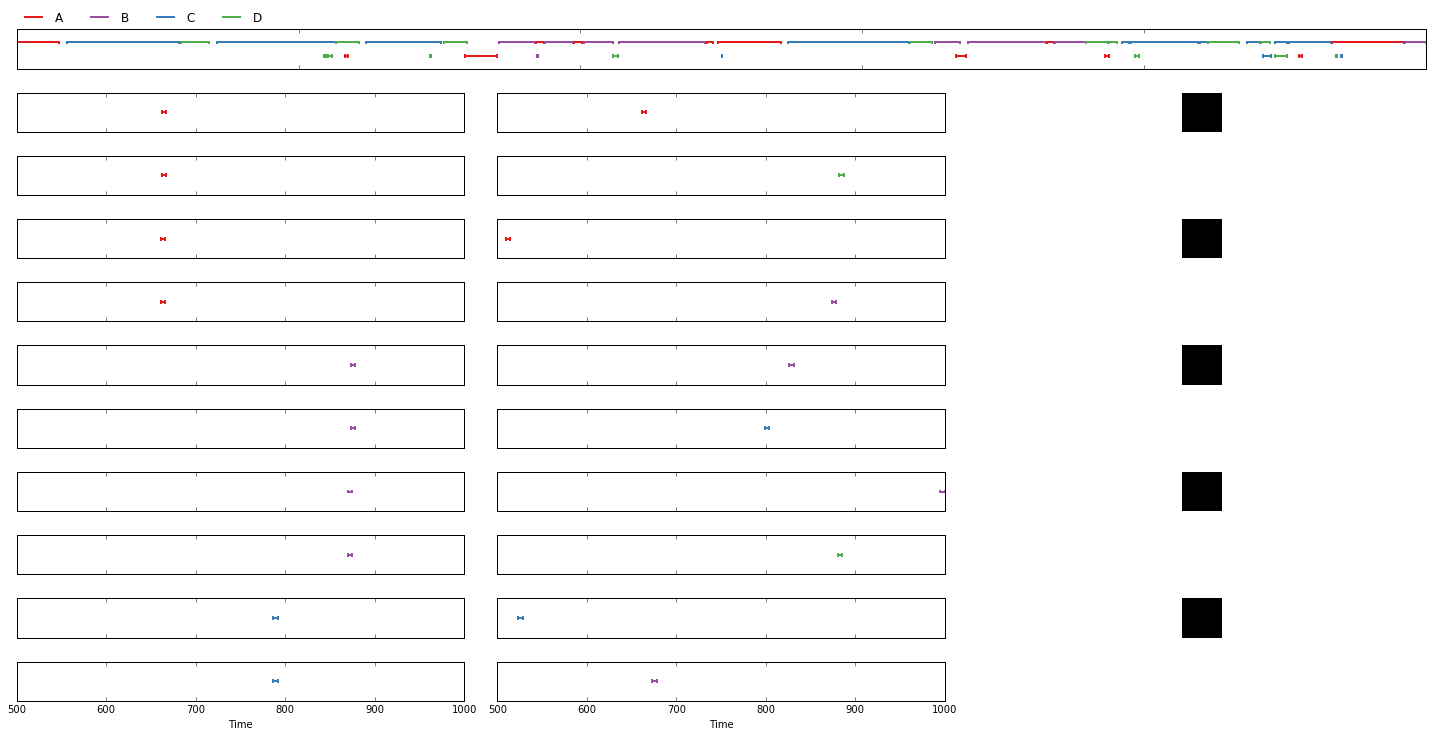

In [20]:
plot_pair_generator(annotation, generator, N=10)